# **Forest Cover Prediction Analysis**

This project involves a comprehensive analysis and modeling process, utilizing various machine learning techniques to predict forest cover types based on cartographic information. Each part of the project builds upon the previous steps, culminating in the creation and evaluation of a robust predictive model.

## Import Necessary Libraries

In [1]:
# Import necessary packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data; Preliminary Analysis

In [2]:
# Load the dataset into a DataFrame
fc = pd.read_csv('../input/forest-cover/forest_cover.txt', delimiter='\t')

# Display the first 5 rows of the DataFrame
fc.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


In [3]:
# Print the shape of the DataFrame
print("Shape of fc DataFrame:", fc.shape)

Shape of fc DataFrame: (15120, 13)


In [4]:
# Display the distribution of cover types
fc['Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

In [5]:
# Create a list named palette containing seven named colors
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Distribution of Cover Type by Wilderness Area

In this section, I will explore the relationship between cover type and wilderness area. I will start by determining the distribution of the wilderness areas within the dataset.

In [6]:
# Display the distribution of wilderness areas within the dataset
wilderness_area_distribution = fc['Wilderness_Area'].value_counts().sort_index()
wilderness_area_distribution

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

In [7]:
# Create a DataFrame to count the number of regions of each cover type in each of the four wilderness areas
ct_by_wa = pd.crosstab(fc['Cover_Type'], fc['Wilderness_Area'])
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


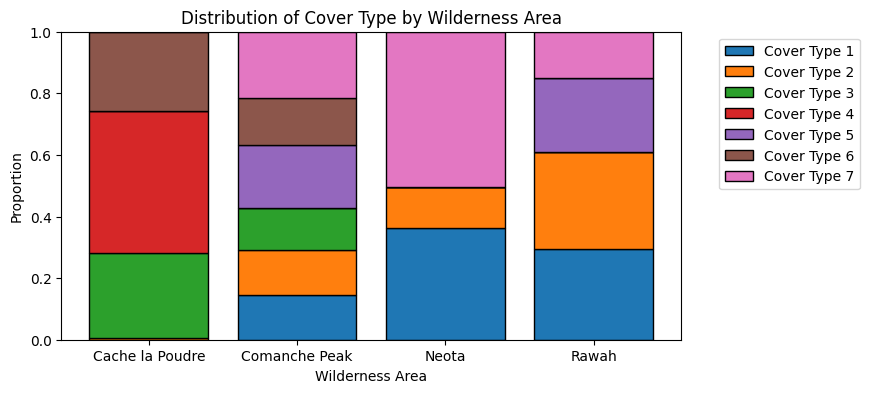

In [8]:
# Convert the count information into proportions
ct_by_wa_props = ct_by_wa.div(ct_by_wa.sum(axis=0), axis=1)

# Calculate the bottom of each bar
bb = np.cumsum(ct_by_wa_props, axis=0) - ct_by_wa_props

# Create a Matplotlib figure
plt.figure(figsize=[8, 4])

# Define the color palette for the bars
palette = plt.get_cmap('tab10').colors

# Loop over the rows of ct_by_wa_props to create a stacked bar chart
for i, (index, row) in enumerate(ct_by_wa_props.iterrows()):
    plt.bar(ct_by_wa.columns, row, bottom=bb.loc[index], edgecolor='black', color=palette[i], label=f'Cover Type {index}')

# Set labels for the x and y axes and the title
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')

# Add a legend to the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the figure
plt.show()

## Distribution of Cover Type by Soil Type

In this section, I will explore the relationship between cover type and soil type. I will start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types. This will help me understand the distribution of different cover types across various soil types in the dataset.

First, I will use **"pd.crosstab()"** to count the number of regions of each cover type for each soil type. I will then store these results in a DataFrame named **"ct_by_st"** and display it.

In [9]:
# Assuming df is the DataFrame that contains the dataset
ct_by_st = pd.crosstab(fc['Cover_Type'], fc['Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


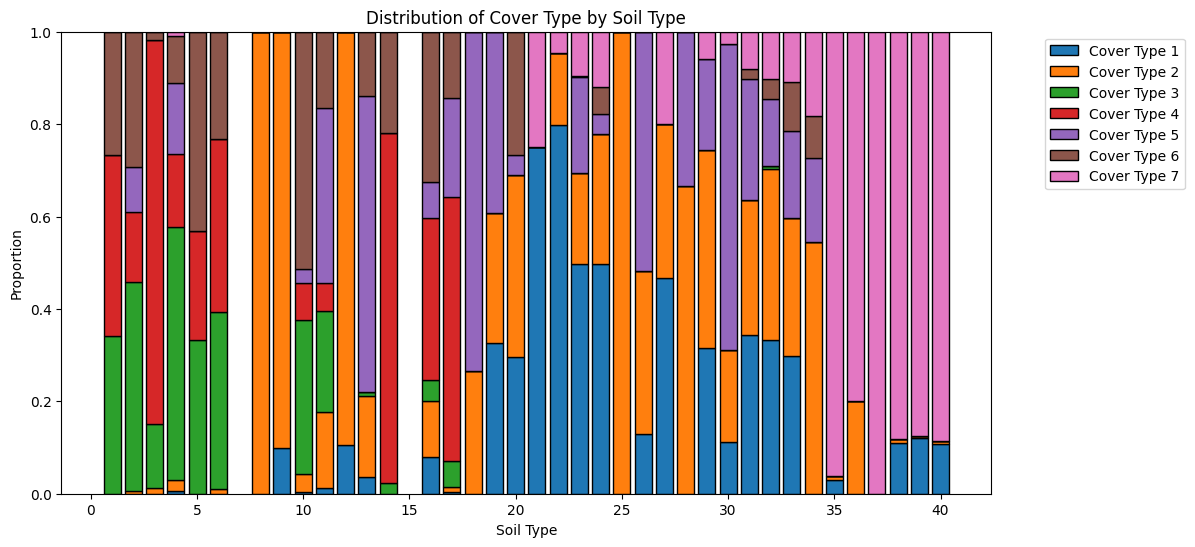

In [10]:
# Convert the count information into proportions
ct_by_st_props = ct_by_st.div(ct_by_st.sum(axis=0), axis=1)

# Calculate the bottom of each bar
bb = np.cumsum(ct_by_st_props, axis=0) - ct_by_st_props

# Create a Matplotlib figure
plt.figure(figsize=[12, 6])

# Define the color palette for the bars
palette = plt.get_cmap('tab10').colors

# Loop over the rows of ct_by_wa_props to create a stacked bar chart
for i, (index, row) in enumerate(ct_by_st_props.iterrows()):
    plt.bar(ct_by_st.columns, row, bottom=bb.loc[index], edgecolor='black', color=palette[i], label=f'Cover Type {index}')

# Set labels for the x and y axes and the title
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')

# Add a legend to the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the figure
plt.show()

## Distribution of Elevation by Cover Type

In this section, I will explore the relationship between cover type and elevation. I will start by calculating the average elevation for each of the seven cover types. This will give me an initial understanding of how elevation varies across different cover types. Afterward, I will create histograms to visually explore the distribution of elevations for each of the seven cover types.

In [11]:
# Select the Elevation and Cover_Type columns, group by Cover_Type, and calculate the mean Elevation
elevation_mean = fc[['Elevation', 'Cover_Type']].groupby('Cover_Type').mean().reset_index()
elevation_mean

,Cover_Type,Elevation
0,1,3128.025926
1,2,2922.540278
2,3,2398.423148
3,4,2223.420370
4,5,2786.801389
5,6,2423.276852
6,7,3362.769907


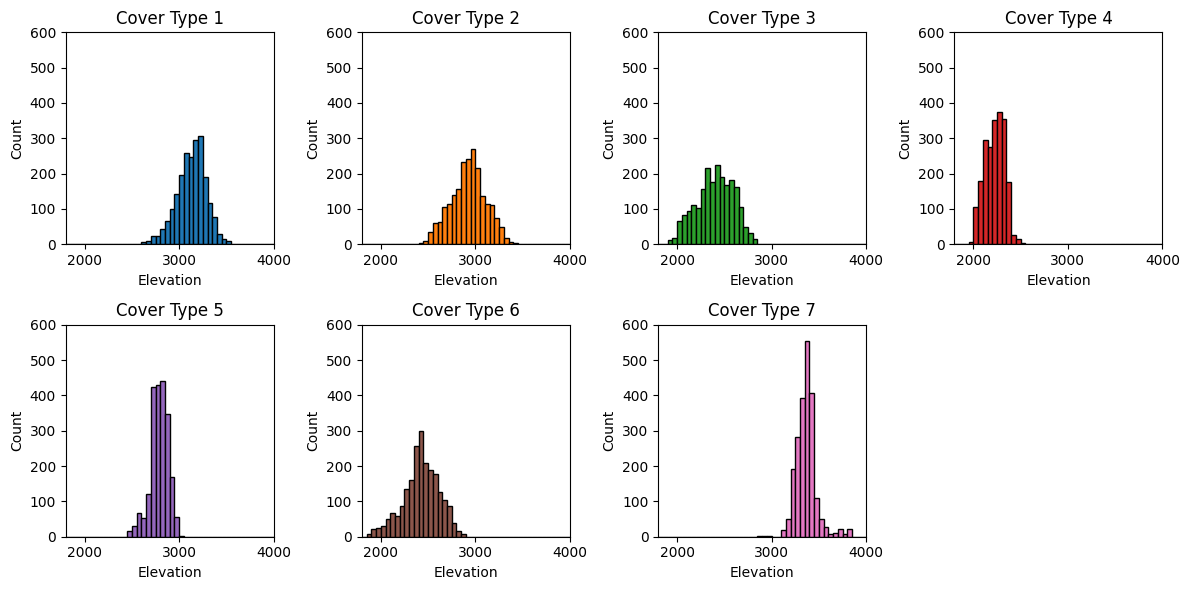

In [12]:
# Create a figure with seven subplots arranged in a 2x4 grid (the bottom right subplot will be empty)
plt.figure(figsize=[12, 6])

# Loop over the possible values of Cover_Type (integers 1 – 7)
for i in range(1, 8):
    plt.subplot(2, 4, i)
    # Add a histogram of Elevation for the current Cover_Type
    plt.hist(fc[fc['Cover_Type'] == i]['Elevation'], bins=np.arange(1800, 4050, 50), color=palette[i-1], edgecolor='black')
    # Set the title of the subplot
    plt.title(f'Cover Type {i}')
    # Set the x-limits and y-limits
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    # Set the axis labels
    plt.xlabel('Elevation')
    plt.ylabel('Count')

# Call plt.tight_layout() and display the figures
plt.tight_layout()
plt.show()

## Creating Training, Validation, and Test Sets

In this section, I will encode our categorical variables and will create training, validation, and test sets. I will start by separating the categorical features, the numerical features, and the labels. 

I will be using **"Cover_Type"** as the label variable in our models. All other columns will be used as features. Of the feature columns, **"Wilderness_Area"** and **"Soil_Type"** are categorical, while all other feature columns are numerical.

In [13]:
# Create a 2D array for numerical features
X_num = fc.loc[:, (fc.columns != 'Wilderness_Area') & 
               (fc.columns != 'Soil_Type') & 
               (fc.columns != 'Cover_Type')].values

# Create a 2D array for categorical features
X_cat = fc[['Wilderness_Area', 'Soil_Type']].values

# Create a 1D array for the labels
y = fc['Cover_Type'].values

# Print the shapes of the arrays
print(f'Numerical Feature Array Shape:   {X_num.shape}')
print(f'Categorical Feature Array Shape: {X_cat.shape}')
print(f'Label Array Shape:               {y.shape}')

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


In [14]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the categorical features
encoder.fit(X_cat)

# Encode the categorical features
X_enc = encoder.transform(X_cat)

# Print the shape of the encoded features array
print(f'Encoded Feature Array Shape: {X_enc.shape}')

Encoded Feature Array Shape: (15120, 42)


In [15]:
# Combine numerical and encoded categorical features
X = np.hstack((X_num, X_enc))

# Print the shape of the combined feature array
print(f'Feature Array Shape: {X.shape}')

Feature Array Shape: (15120, 52)


In [16]:
# Split the data into training and holdout sets using a 70/30 split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

# Split the holdout data into validation and test sets using a 50/50 split
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.50, random_state=1, stratify=y_hold)

# Print the shapes of the training, validation, and test feature arrays
print(f'Training Features Shape:   {X_train.shape}')
print(f'Validation Features Shape: {X_valid.shape}')
print(f'Test Features Shape:       {X_test.shape}')

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Logistic Regression Model

In this part, I will create and evaluate a logistic regression model. The purpose of this code is to fit the model to the training data and then calculate and display the training and validation accuracy scores.

In [17]:
# Create and fit the logistic regression model
lr_mod = LogisticRegression(solver='saga', max_iter=3000, multi_class='multinomial', penalty=None)
lr_mod.fit(X_train, y_train)

# Calculate the training and validation accuracy
training_accuracy = lr_mod.score(X_train, y_train)
validation_accuracy = lr_mod.score(X_valid, y_valid)

# Print the accuracy scores
print(f"Training Accuracy:   {training_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")


Training Accuracy:   0.6129
Validation Accuracy: 0.6160


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
